In [1]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterator, *args, **kwargs):
        return iterator
import os, sys, glob, warnings, glob    
import numpy as np
import scipy as sp
from scipy import constants
from pylab import *
import joblib
import importlib
from importlib import reload
sys.path.append("/home/owhgabri/My_GitHub/MATHUSLA_JupyterNoteBooks/tracker")
sys.path.insert(1, "/home/owhgabri/My_GitHub/MATHUSLA_JupyterNoteBooks/tracker")
os.chdir('/home/owhgabri/My_GitHub/pyTracker')
print(os.getcwd())
print(joblib.__version__)

/home/owhgabri/My_GitHub/pyTracker
1.4.2


In [2]:
import scipy
import copy as cp

# ROOT
import ROOT as root

# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import collections, colors, transforms

%matplotlib inline
%config InlineBackend.figure_format='retina'
# %matplotlib widget

import pprint

Welcome to JupyROOT 6.26/14


In [3]:
import kalmanfilter as KF
import utilities as Util
import trackfinder as TF
import datatypes
from datatypes import *

reload(TF)
reload(Util)

<module 'utilities' from '/home/owhgabri/My_GitHub/MATHUSLA_JupyterNoteBooks/tracker/utilities.py'>

In [6]:
data_top_dir = f"/home/owhgabri/My_GitHub/data/Reconstruction/LLP"
pathList=[]

for rootFile, dirs, files in os.walk(data_top_dir):
    for filename in files:
        if ".pkl" in filename:
            pathList.append(os.path.join(rootFile, filename))


print(len(pathList))

5


In [7]:
nTracks = []
nVertices = []
for f in pathList: # Go through each file
    events=joblib.load(f)
    file_hits = events["hits"]
    file_tracks = events["tracks"]
    file_vertices = events["vertices"]
    for i in range(len(file_hits)): # For each event
        hits= file_hits[i]
        tracks = file_tracks[i]
        vertices = file_vertices[i]
        nTracks.append(len(tracks))
        nVertices.append(len(vertices))
        

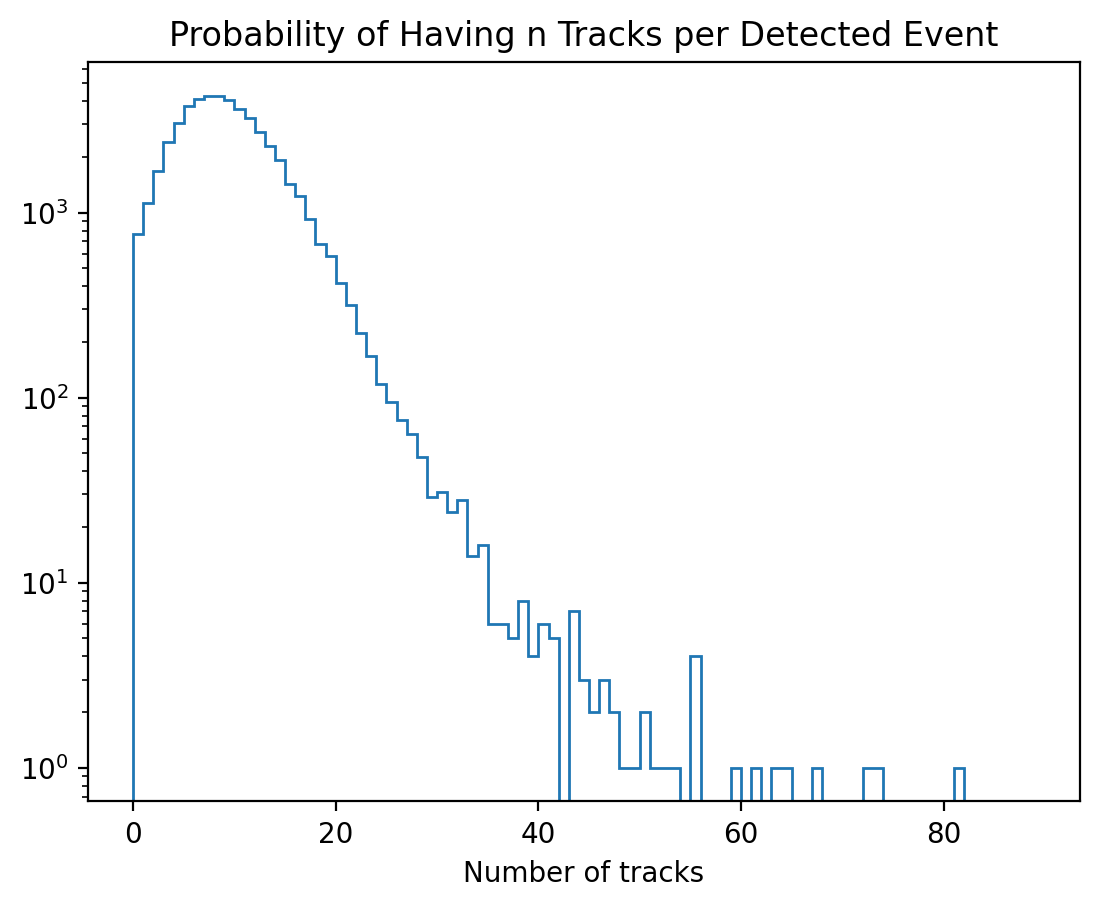

Total Entries: 49941
[ 762 1133 1685 2417 3038 3772 4131 4250 4276 4070 3617 3242 2738 2290
 1931 1426 1235  929  675  580  417  315  225  168  118   95   76   64
   48   29   31   24   28   14   16    6    6    5    8    4    6    5
    0    7    3    2    3    2    1    1    2    1    1    1    0    4
    0    0    0    1    0    1    0    1    1    0    0    1    0    0
    0    0    1    1    0    0    0    0    0    0    0    1    0    0
    0    0    0    0    0]


In [12]:
counts,bins = np.histogram(nTracks, bins=np.arange(0,90,1))
plt.stairs(counts,bins)
plt.xlabel("Number of tracks")
plt.title("Probability of Having n Tracks per Detected Event")
plt.yscale("log")
plt.show()

print("Total Entries:", sum(counts))
print(counts)

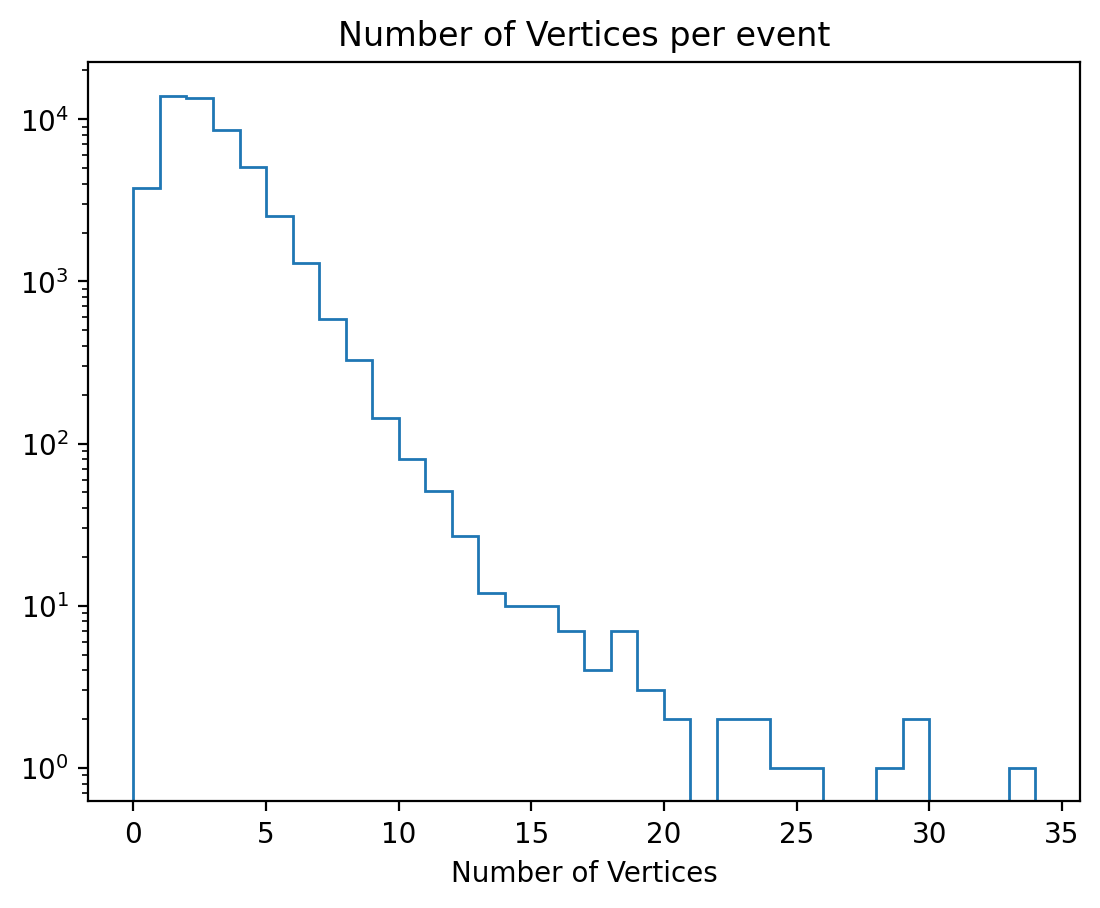

Total Entries: 49941
[ 3788 13938 13433  8601  5068  2529  1306   584   327   144    80    51
    27    12    10    10     7     4     7     3     2     0     2     2
     1     1     0     0     1     2     0     0     0     1]


In [18]:
counts,bins = np.histogram(nVertices, bins=np.arange(0,35,1))
plt.stairs(counts,bins)
plt.xlabel("Number of Vertices")
plt.title("Number of Vertices per event")
plt.yscale("log")
plt.show()

print("Total Entries:", sum(counts))
print(counts)